In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from collections import Counter
import re
from sklearn.model_selection import train_test_split

In [3]:
df_train = pd.read_csv("./train.csv")

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Lets learn the different types of data available:

In [16]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Time to Visualize the dataset

Text(0.5, 1.0, 'Ratio of the classes')

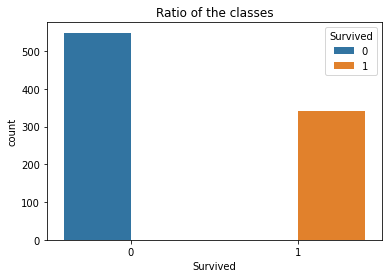

In [17]:
# Checking the ratio 
sb.countplot(data=df_train,x="Survived",hue="Survived")
plt.title("Ratio of the classes")

## Checking the relationship of each feature against the class labels

- This will help us judge the importance of features

<AxesSubplot:xlabel='Sex', ylabel='count'>

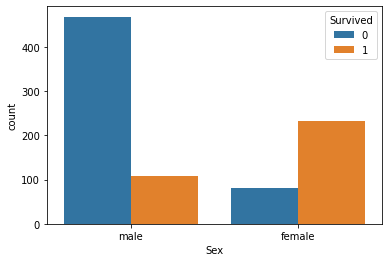

In [18]:
#Checking the "Sex" feature and the corresponding Survival rate
sb.countplot(x="Sex",data=df_train,hue="Survived")

### What conclusions can we draw from this?

- "Sex" is one of the main predictors/one of the most helpful
- 
- Higher fare, better survivial
- Age factor/"Age" is not a strong predictor/might be
- Male with class 3 cabin survival rate was less as compared to female
- Pclass as a good indicator
- "Age" and Pclass might be correlated

Story:
- Looking at the dataset we can clearly see that female and children were prioritised for the lifeboats
- People in the higher classes had a better chance of survival 
- Pclass=3 might have survived better than people from Pclass 2

<AxesSubplot:xlabel='Pclass', ylabel='count'>

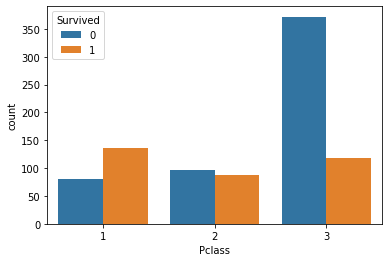

In [19]:
#Checking the "Pclass" feature and the corresponding Survival rate
sb.countplot(x="Pclass",data=df_train,hue="Survived")

<AxesSubplot:xlabel='Parch', ylabel='count'>

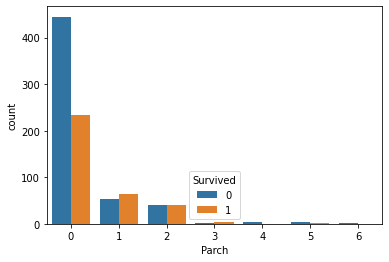

In [23]:
#Checking the "Siblings" feature and the corresponding Survival rate
sb.countplot(x="Parch",data=df_train,hue="Survived")


In [80]:
# This code is used to check for the survival numbers per Title in a given name: This is the longer version
survived_or_not = []
for num,i in df_train.iterrows():
  if "Dr." in i["Name"]:
    print(i["Na"])
    survived_or_not.append(i["Survived"])

PassengerId                            246
Survived                                 0
Pclass                                   1
Name           Minahan, Dr. William Edward
Sex                                   male
Age                                   44.0
SibSp                                    2
Parch                                    0
Ticket                               19928
Fare                                  90.0
Cabin                                  C78
Embarked                                 Q
Name: 245, dtype: object
PassengerId                     318
Survived                          0
Pclass                            2
Name           Moraweck, Dr. Ernest
Sex                            male
Age                            54.0
SibSp                             0
Parch                             0
Ticket                        29011
Fare                           14.0
Cabin                           NaN
Embarked                          S
Name: 317, dtype: object
Pa

In [72]:
# Counter is a function provided in the collections module imported at the beginning that allows you to create a dictionary of counts from a given list. 
Counter(survived_or_not)

Counter({0: 4, 1: 3})

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [69]:
# This is the pandas way of performing the same task as described above.
df_train.Name.str.contains("Dr.").value_counts()

False    891
Name: Name, dtype: int64

In [28]:
# A function provided by pandas to create the one-hot encoding for a given categorical variable
pd.get_dummies(df_train['Titles'])

KeyError: 'Titles'

In [85]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
#But what is Pclass?
#group the same pclass together to calculate the mean of the
df_train.groupby(by = "Pclass")["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

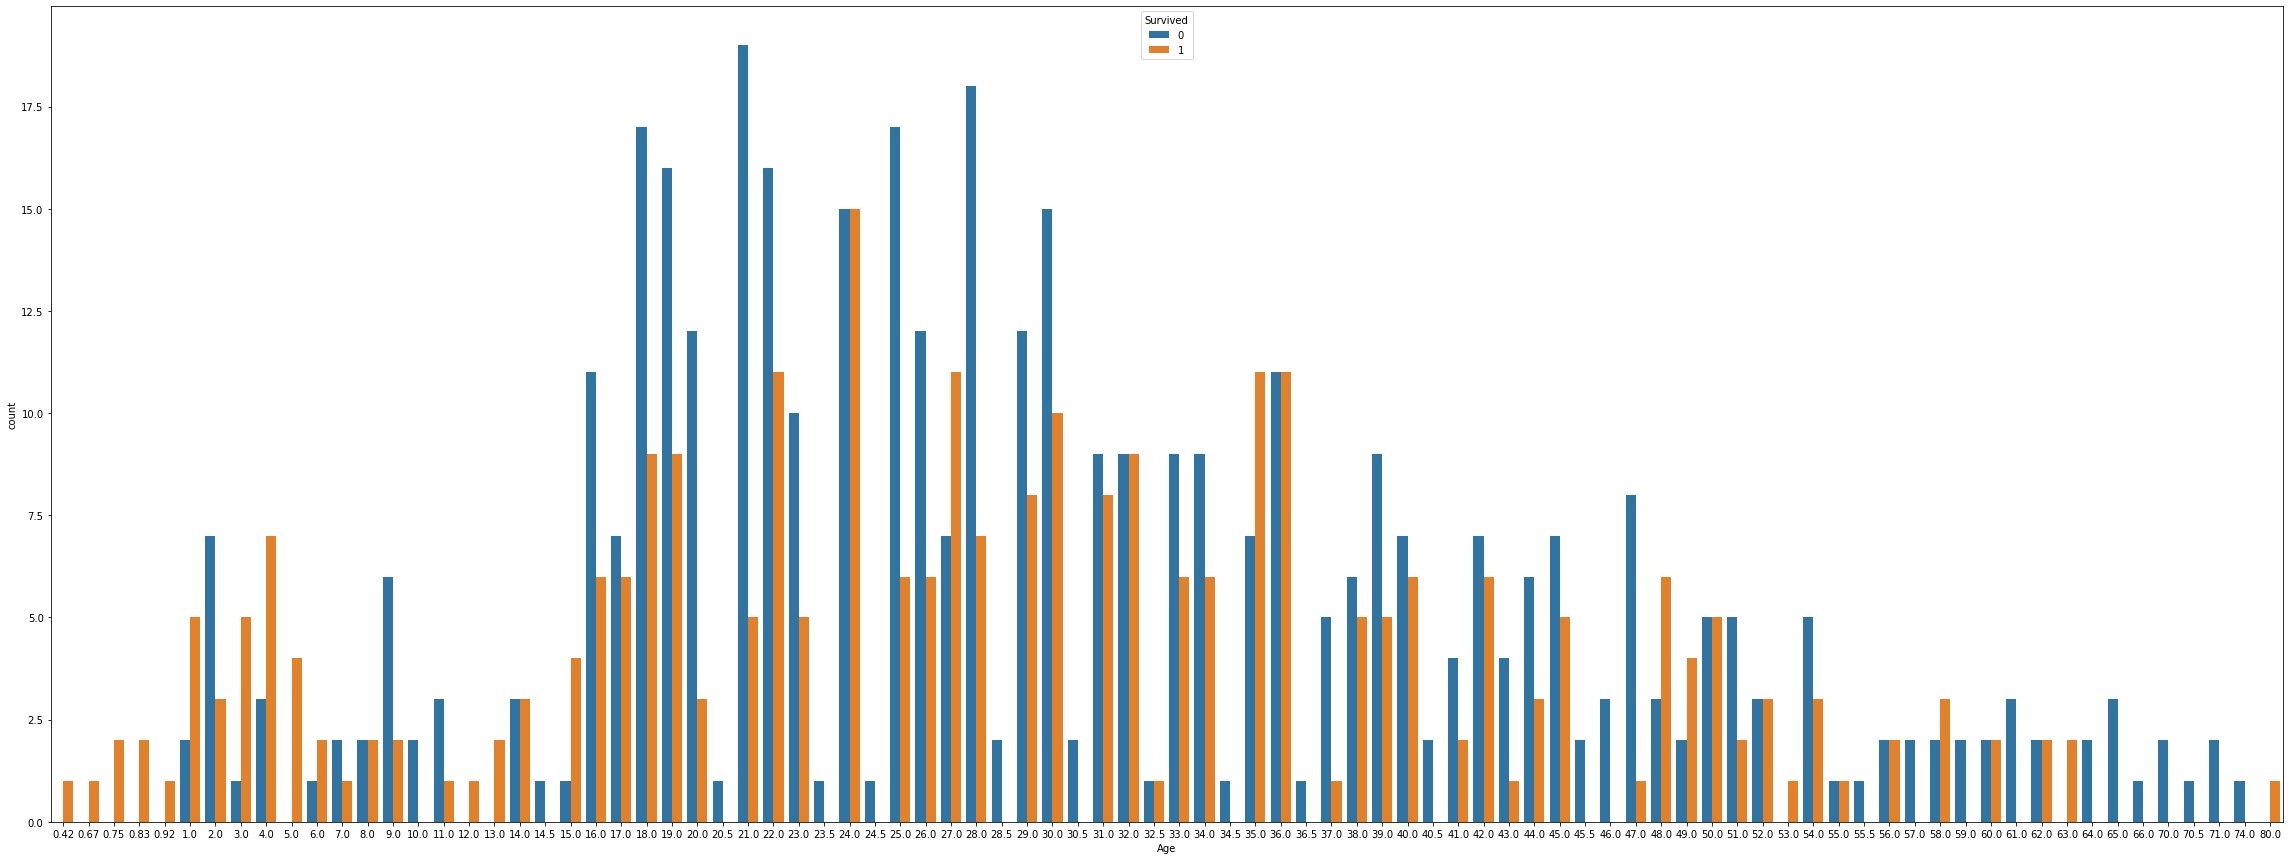

In [ ]:
#Checking the "Age" feature and the corresponding Survival rate
plt.figure(figsize=(40,15))
sb.countplot(x="Age",data=df_train,hue="Survived")
# sb.lineplot(y="Age",data=df_train,hue="Survived")

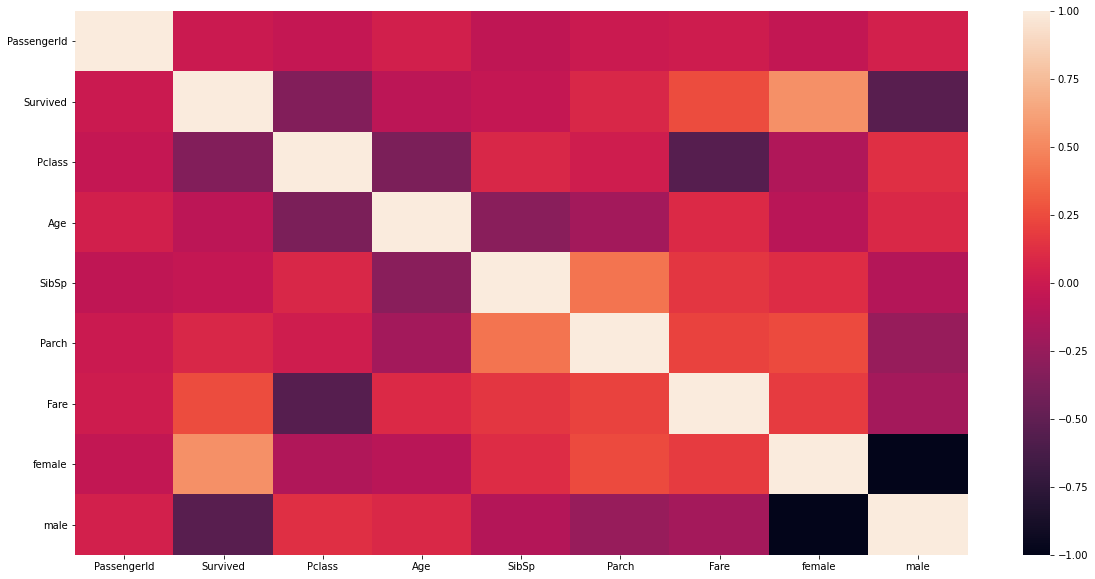

In [ ]:
plt.figure(figsize=(20,10))
sb.heatmap(df_train.corr())

### Create your new features

In [ ]:
df_train[['female','male']] = pd.get_dummies(df_train['Sex'])

In [ ]:
df_train[["C","Q","S"]] = pd.get_dummies(df_train['Embarked'])

In [154]:
df_train

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,26.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [100]:
#Drop the irrelevant features
drop_features = ['PassengerId','Ticket','Name','Cabin',"Embarked"]
df_train.drop(drop_features,inplace=True,axis=1)
# df_train.drop('Sex',axis=1,inplace=True)

In [110]:
#loc: slices the pandas dataframe (specify row range first, then column range)
df_train.loc[:,'Pclass':]

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [111]:
df_train.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
female        0
male          0
C             0
Q             0
S             0
dtype: int64

## Dealing with missing values


In [112]:
df_train.fillna(method="backfill",inplace=True)

In [113]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(df_train.loc[:,'Pclass':],df_train.Survived,\
                                                          test_size=0.2) # Splitting the data into train and test

In [114]:
titanic_model_v1 = LogisticRegression()#Creating and training your model
titanic_model_v1.fit(x_train_2,y_train_2)

C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [115]:
y_predictions = titanic_model_v1.predict(x_test_2)#predictions stored in y_predictions

In [116]:
print(classification_report(y_test_2,y_predictions))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       114
           1       0.70      0.60      0.64        65

    accuracy                           0.76       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.76      0.76      0.76       179



In [139]:
df_test = pd.read_csv("./test.csv")

In [140]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [141]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [142]:
# Need to perform all the above feature engineering steps as done for the training dataset.
# VERY IMPORTANT: THE TEST DATASET SHOULD LOOK EXACTLY LIKE THE TRAINING DATASET
df_test[['female','male']] = pd.get_dummies(df_test['Sex'])
df_test[["C","Q","S"]] = pd.get_dummies(df_test["Embarked"])
df_test.fillna(method="ffill",inplace=True)
drop_features = ["Sex",'Ticket','Name','Cabin',"Embarked"]
df_test.drop(drop_features,inplace=True,axis=1)

In [143]:
df_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,28.0,0,0,8.0500,0,1,0,0,1
414,1306,1,39.0,0,0,108.9000,1,0,1,0,0
415,1307,3,38.5,0,0,7.2500,0,1,0,0,1
416,1308,3,38.5,0,0,8.0500,0,1,0,0,1


In [155]:
predictions_for_submission = titanic_model_v1.predict(df_test.loc[:,"Pclass":])

In [156]:
# in the test dataset, copy the passengerid column
df_submission = df_test[['PassengerId']].copy()

In [126]:
df_submission['Survived'] = predictions_for_submission

In [127]:
df_submission.to_csv("submission_v1.csv")#Save your file as per the gender_submission.csv file provided in Kaggle

## Advanced Feature Engineering Techniques

- Here we will discover techniques such as PCA, RFE and SelectKBest

In [146]:
from sklearn.feature_selection import SelectKBest, chi2

In [148]:
df_train

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,26.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [149]:
selectkbest_algo = SelectKBest(chi2, k=5)# An advanced feature engineering algorithm to select k best features (in this case, k = 5) using the training dataset (xtrain, ytrain)
# works on every column and assigns a score to every column; then takes the top k best scores 

selectkbest_algo.fit_transform(x_train_2, y_train_2)
#Forward feture selection
#Backward 

array([[ 2.  ,  8.  , 36.75,  0.  ,  1.  ],
       [ 3.  , 47.  , 14.5 ,  1.  ,  0.  ],
       [ 3.  , 25.  ,  0.  ,  0.  ,  1.  ],
       ...,
       [ 1.  , 15.  , 35.  ,  0.  ,  1.  ],
       [ 1.  , 28.  , 26.55,  0.  ,  1.  ],
       [ 1.  , 30.  , 31.  ,  1.  ,  0.  ]])

In [150]:
selectkbest_algo.get_support()#Function used to determine which columns have been selected. True indicates that particular column number has been selected

array([ True,  True, False, False,  True,  True,  True, False, False,
       False])

KeyError: "None of [Index(['True', 'selectkbest_algo.get_support()'], dtype='object')] are in the [index]"

In [ ]:
df_train.loc[["True"] + ["selectkbest_algo.get_support()"]]